## CAPM - Capital Asset Pricing Model

In [1]:
from scipy import stats

In [2]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None, alternative='two-sided')
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension. In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    alternative : {'two-sided', 'less', 'greater'}, optional
        Defines the alternative hypothesis. Default is 'two-sided'.
        The following options are available:
    
        * 'two-sided': the slope of the regression line is nonzero
        * 'less': the slope of the regression line is l

In [3]:
import pandas as pd
import pandas_datareader as web
import quandl

In [4]:
start = pd.to_datetime('2015-01-23')
end = pd.to_datetime('2018-03-22')

In [5]:
spy_etf = web.DataReader('SPY','yahoo',start,end)

In [6]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 797 entries, 2015-01-23 to 2018-03-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       797 non-null    float64
 1   Low        797 non-null    float64
 2   Open       797 non-null    float64
 3   Close      797 non-null    float64
 4   Volume     797 non-null    float64
 5   Adj Close  797 non-null    float64
dtypes: float64(6)
memory usage: 43.6 KB


In [7]:
spy_etf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-23,206.100006,204.809998,205.789993,204.970001,117516800.0,178.610046
2015-01-26,205.559998,203.850006,204.710007,205.449997,92009700.0,179.028305
2015-01-27,204.119995,201.740005,202.970001,202.740005,134044600.0,176.666763
2015-01-28,204.289993,199.910004,204.169998,200.139999,168514300.0,174.401169
2015-01-29,202.300003,198.679993,200.380005,201.990005,173585400.0,176.013275


In [8]:
aapl = quandl.get('WIKI/AAPL',start_date=start,end_date=end)

In [9]:
aapl.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-16,178.65,179.12,177.62,178.020,36836456.0,0.0,1.0,178.65,179.12,177.62,178.020,36836456.0
2018-03-19,177.32,177.47,173.66,175.300,32804695.0,0.0,1.0,177.32,177.47,173.66,175.300,32804695.0
2018-03-20,175.24,176.80,174.94,175.240,19314039.0,0.0,1.0,175.24,176.80,174.94,175.240,19314039.0
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,175.09,171.26,171.270,35247358.0
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0


In [10]:
import matplotlib.pyplot as plt

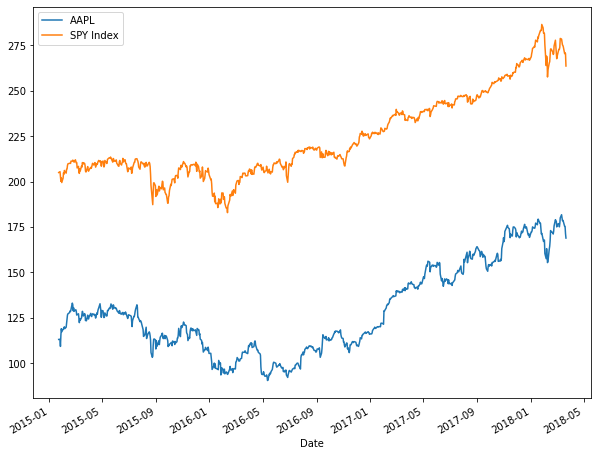

In [11]:
aapl['Close'].plot(label='AAPL',figsize=(10,8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend();

**Comparison of cumulative returns**

In [12]:
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

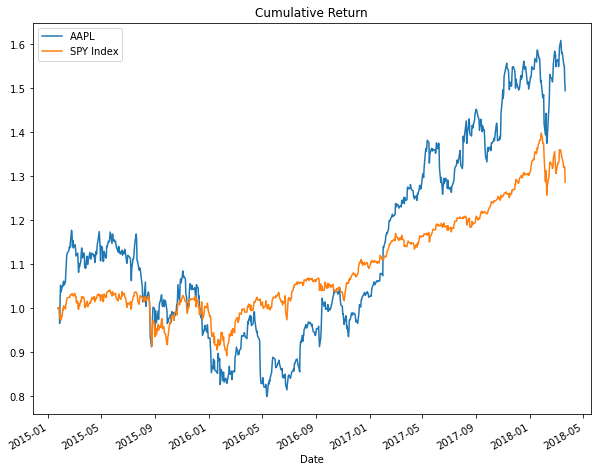

In [13]:
aapl['Cumulative'].plot(label='AAPL',figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY Index')
plt.legend()
plt.title('Cumulative Return');

**Daily Render**

In [19]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

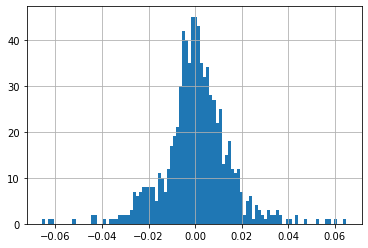

In [24]:
aapl['Daily Return'].hist(bins=100);

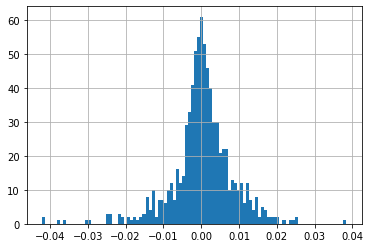

In [25]:
spy_etf['Daily Return'].hist(bins=100);

In [32]:
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[3:])

In [33]:
beta

0.04110996979591712

In [34]:
alpha

0.00033883716476159833

In [35]:
r_value

0.07312278720928862

In [36]:
spy_etf['Daily Return'].head()

Date
2015-01-23         NaN
2015-01-26    0.002342
2015-01-27   -0.013191
2015-01-28   -0.012824
2015-01-29    0.009244
Name: Daily Return, dtype: float64

In [37]:
import numpy as np

In [38]:
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

In [39]:
noise

array([ 1.01338084e-03, -5.13737142e-04, -4.06166927e-04,  5.89114361e-04,
        2.44386743e-04, -1.35181146e-03,  1.35515880e-03, -8.74571215e-04,
       -8.82056145e-04, -6.34849001e-04,  1.36326129e-03,  1.69285842e-03,
       -3.25931076e-04,  1.26038923e-03,  1.20694981e-03, -5.78420593e-04,
        1.77159383e-05, -9.69470176e-05,  8.43262399e-04,  5.02596057e-04,
       -1.48561519e-03,  1.06390496e-03,  3.73909642e-04, -1.63303235e-04,
       -2.17969239e-04, -4.33912591e-04,  1.59704617e-03, -2.26380720e-03,
       -6.40305616e-04,  7.57838963e-04, -1.28313922e-03,  3.64858333e-05,
       -2.49441927e-03,  2.52839239e-04,  4.09600720e-04,  5.78943788e-04,
       -1.21596431e-03, -7.87914480e-04,  3.27506086e-04, -1.61471026e-04,
        8.08496931e-04,  5.56991152e-04,  3.71175497e-04,  5.90935943e-04,
       -4.11302104e-04,  1.11328013e-03, -5.64006431e-04, -4.93891848e-04,
       -3.68687066e-05, -1.09902196e-03, -3.25228457e-04,  9.57000775e-05,
        6.80426875e-05,  

In [49]:
fake_stock = spy_etf['Daily Return'].iloc[1:] + noise

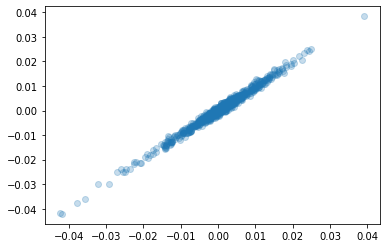

In [50]:
plt.scatter(fake_stock,spy_etf['Daily Return'].iloc[1:], alpha=0.25);

In [57]:
beta,alpha,r_value,p_value,std_err = stats.linregress(fake_stock,spy_etf['Daily Return'].iloc[1:])

In [58]:
beta

0.9786431885787971

In [59]:
alpha

6.307495901451243e-06